<a href="https://colab.research.google.com/github/ShivaniBebi/Spam-email-detection/blob/main/Fake_new_Dedection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:

df = pd.read_csv('/content/fake_news_dataset.csv')


In [26]:
df = df.dropna(subset=['text', 'label'])
df['label'] = df['label'].map({'real': 1, 'fake': 0})

In [32]:

ps = PorterStemmer()
def text_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(text_clean)


In [ ]:

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)


In [11]:

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [12]:

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [13]:

y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)

Text(120.72222222222221, 0.5, 'Actual')

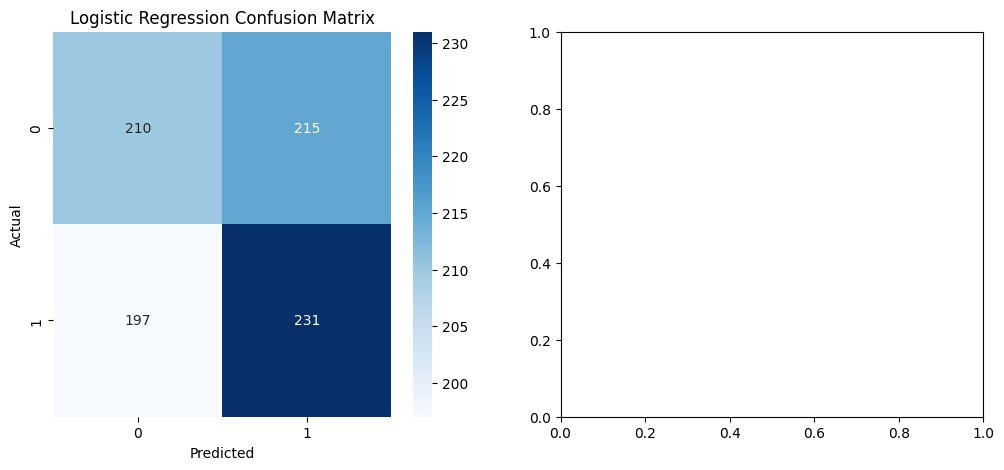

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")


In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Naive Bayes Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_text'])

X_seq = tokenizer.texts_to_sequences(df['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=200)

y = df['label']
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=2)


In [19]:

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train_pad, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 38s 676ms/step - accuracy: 0.4889 - loss: 0.6936 - val_accuracy: 0.4487 - val_loss: 0.6941
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 662ms/step - accuracy: 0.6228 - loss: 0.6793 - val_accuracy: 0.4927 - val_loss: 0.6991
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 656ms/step - accuracy: 0.6915 - loss: 0.6084 - val_accuracy: 0.4663 - val_loss: 0.7678
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 42s 682ms/step - accuracy: 0.7625 - loss: 0.5148 - val_accuracy: 0.5132 - val_loss: 0.8195
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 654ms/step - accuracy: 0.7851 - loss: 0.4777 - val_accuracy: 0.5015 - val_loss: 0.8850


27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.5272 - loss: 0.9289

LSTM Accuracy: 0.5228604674339294


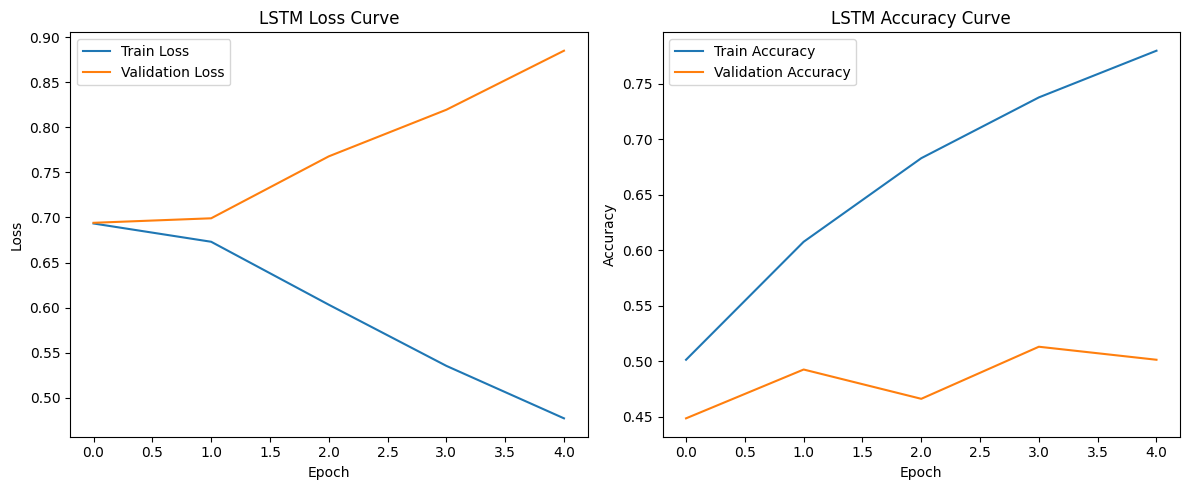

In [20]:

loss, acc = model.evaluate(X_test_pad, y_test_pad)
print("\nLSTM Accuracy:", acc)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
